Use the famous boston dataset and find out if there is multicollinearity or not. If there is multicollinearity try to remove it with help of steps taught in the session.

In [1]:
# Link - https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:/Users/bhard/OneDrive/Desktop/Everything Exist Here/Assignements]/BostonHousing.csv")

In [4]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


1. CORRELATION MATRIX WAY

In [5]:
corr_matrix = df.corr()

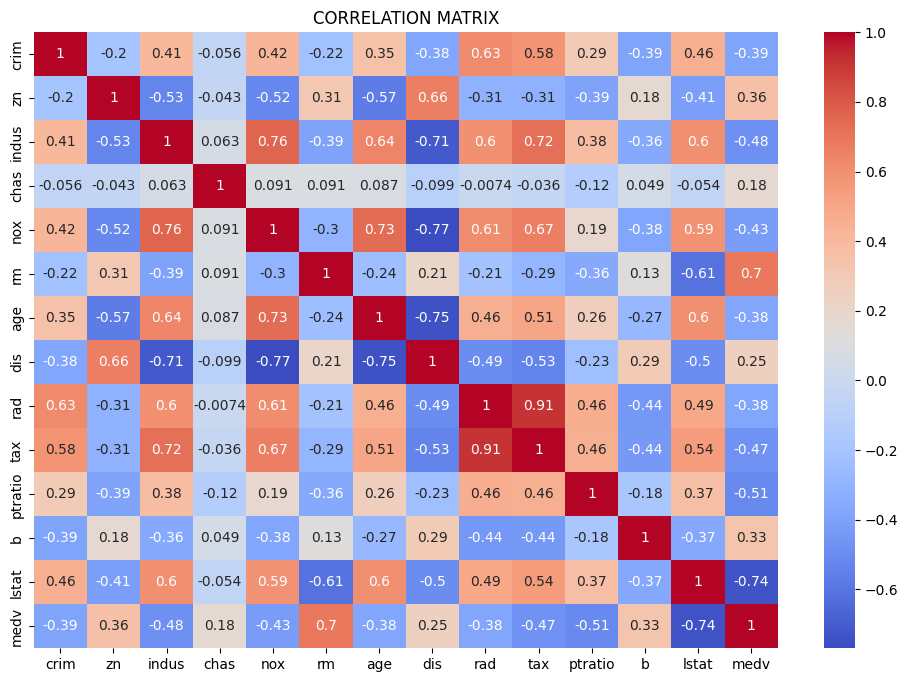

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.title('CORRELATION MATRIX')
plt.show()

2. REMOVE HIGHLY CORRELATED FEATURES

In [7]:
threshold = 0.8
highly_corr_features = np.where(np.abs(corr_matrix.values[:-1,:-1]) >= threshold)
features_to_remove = set()
for i, j in zip(*highly_corr_features) :
    if i!=j and i not in features_to_remove and j not in features_to_remove:
        features_to_remove.add(j if np.abs(corr_matrix['medv']).iloc[i] > np.abs(corr_matrix['medv']).iloc[j] else i)

df_filtered_corr = df.drop(df.columns[list(features_to_remove)], axis = 1)

In [8]:
df_filtered_corr

,crim,zn,indus,chas,nox,rm,age,dis,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,273,21.0,393.45,6.48,22.0


In [9]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [10]:
x = df.drop('medv', axis = 1)

In [13]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

In [14]:
vif

,Feature,VIF
0,crim,2.100373
1,zn,2.844013
2,indus,14.485758
3,chas,1.152952
4,nox,73.894947
5,rm,77.948283
6,age,21.386850
7,dis,14.699652
8,rad,15.167725
9,tax,61.227274


In [ ]:
vif_threshold = 5
high_vif_features = vif[vif['VIF'] > vif_threshold]['Feature'].values
df